# 4.Evaluation metrics for classification

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('../linear-classification/data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [6]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [7]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [8]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.801277501774308)

# 4.2 Accuracy and dummy model

In [10]:
len(y_val)

1409

In [11]:
(churn_decision == y_val).mean()

np.float64(0.801277501774308)

In [19]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean().tolist()
    print('%.2f %.3f' %(t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [18]:
scores

[0.2739531582682754,
 0.5088715400993612,
 0.5982966643009227,
 0.6635911994322214,
 0.7068843151171044,
 0.7374024130589071,
 0.759403832505323,
 0.765791341376863,
 0.7799858055358411,
 0.7934705464868701,
 0.801277501774308,
 0.7984386089425124,
 0.7970191625266146,
 0.7842441447835344,
 0.7650816181689141,
 0.7437899219304471,
 0.7295954577714692,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

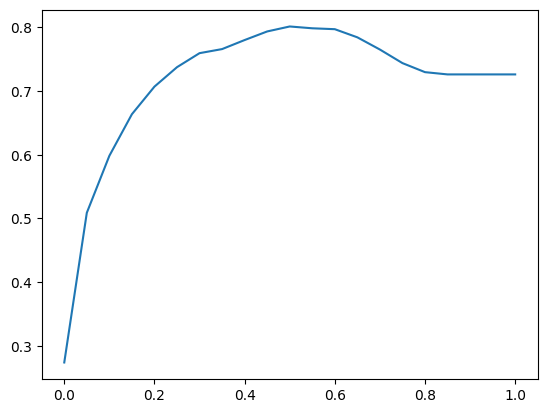

In [21]:
plt.plot(thresholds, scores)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_val, y_pred >= 0.5)

0.801277501774308

In [24]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' %(t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.598
0.15 0.664
0.20 0.707
0.25 0.737
0.30 0.759
0.35 0.766
0.40 0.780
0.45 0.793
0.50 0.801
0.55 0.798
0.60 0.797
0.65 0.784
0.70 0.765
0.75 0.744
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [25]:
y_pred >= 1.0

array([False, False, False, ..., False, False, False], shape=(1409,))

In [26]:
from collections import Counter

In [27]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [28]:
Counter(y_val)

Counter({np.int64(0): 1023, np.int64(1): 386})

In [30]:
1 - y_val.mean().tolist()

0.7260468417317246

# 4.3 Confusion table

In [31]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [32]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [33]:
predict_negative

array([ True,  True,  True, ...,  True, False, False], shape=(1409,))

In [43]:
tp = (predict_positive & actual_positive).sum().tolist()
tn = (predict_negative & actual_negative).sum().tolist()

In [44]:
fp = (predict_positive & actual_negative).sum().tolist()
fn = (predict_negative & actual_positive).sum().tolist()

In [46]:
confusion_matrix = np.array([
    [tn, tp],
    [fn, fp]
])
confusion_matrix

array([[915, 214],
       [172, 108]])

In [49]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.15],
       [0.12, 0.08]])

# 4.4 Precision and Recall

In [50]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.801277501774308

In [54]:
precision = tp / (tp + fp)
precision

0.6645962732919255

In [56]:
recall = tp / (tp + fn)
recall

0.5544041450777202

# 4.5 ROC Curves

In [57]:
FPR = fp / (fp + tn)
FPR

0.10557184750733138

In [58]:
TPR = tp / (tp + fn)
TPR

0.5544041450777202

In [61]:
thresholds = np.linspace(0, 1, 101)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)   

    tp = (predict_positive & actual_positive).sum().tolist()
    tn = (predict_negative & actual_negative).sum().tolist()

    fp = (predict_positive & actual_negative).sum().tolist()
    fn = (predict_negative & actual_positive).sum().tolist()

    scores.append((t.tolist(), tp, fp, fn, tn))

In [67]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [68]:
df_scores.head()

threshold   tp    fp  fn   tn
0       0.00  386  1023   0    0
1       0.01  385   903   1  120
2       0.02  384   812   2  211
3       0.03  382   753   4  270
4       0.04  380   708   6  315

In [69]:
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

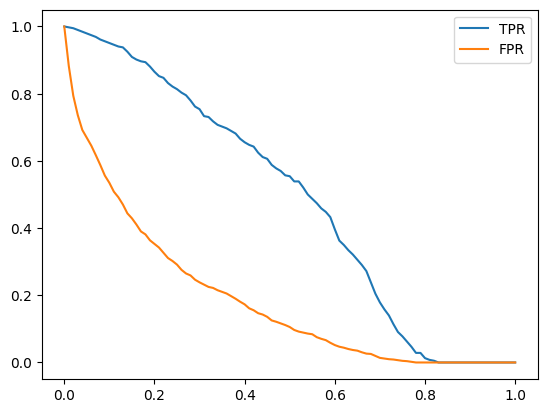

In [70]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

## Random model

In [71]:
np.random.seed(2)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [72]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5067423704755145)

In [73]:
def tpr_fpr_dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)

    scores = []
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)   
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    
    return df_scores

In [74]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

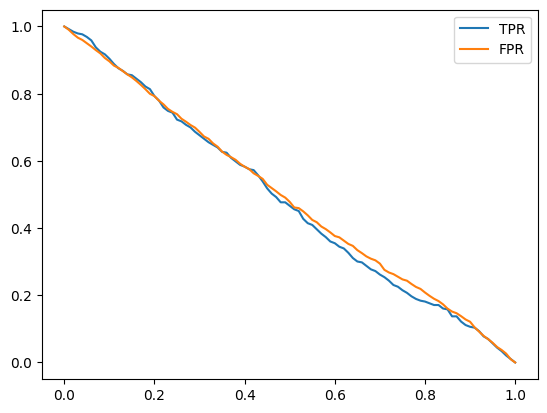

In [77]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

## Ideal model

In [80]:
num_neg = (y_val == 0).sum().tolist()
num_pos = (y_val == 1).sum().tolist()
num_neg, num_pos

(1023, 386)

In [81]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [82]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [83]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [85]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [86]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [88]:
df_ideal[::10]

threshold   tp    fp   fn    tn       fpr       tpr
0          0.0  386  1023    0     0  1.000000  1.000000
10         0.1  386   882    0   141  0.862170  1.000000
20         0.2  386   741    0   282  0.724340  1.000000
30         0.3  386   600    0   423  0.586510  1.000000
40         0.4  386   459    0   564  0.448680  1.000000
50         0.5  386   319    0   704  0.311828  1.000000
60         0.6  386   178    0   845  0.173998  1.000000
70         0.7  386    37    0   986  0.036168  1.000000
80         0.8  282     0  104  1023  0.000000  0.730570
90         0.9  141     0  245  1023  0.000000  0.365285
100        1.0    1     0  385  1023  0.000000  0.002591

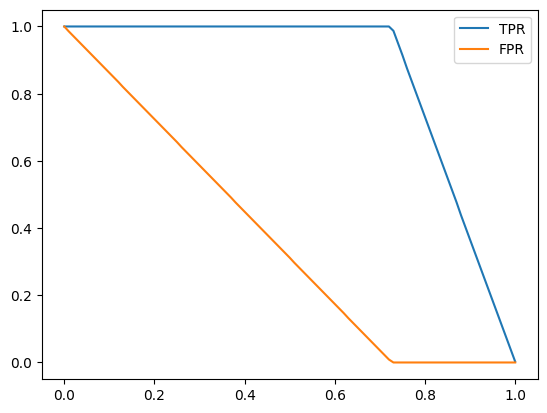

In [89]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

## Put everything together

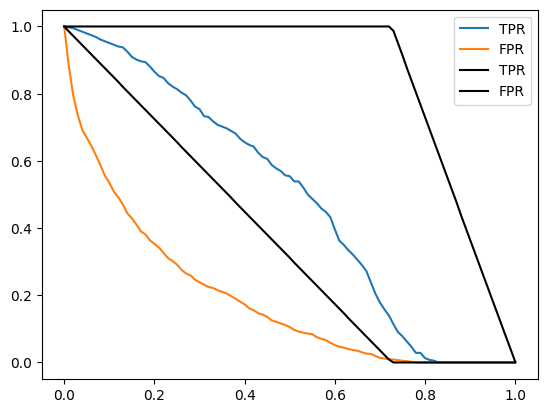

In [90]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color='black')
plt.legend()

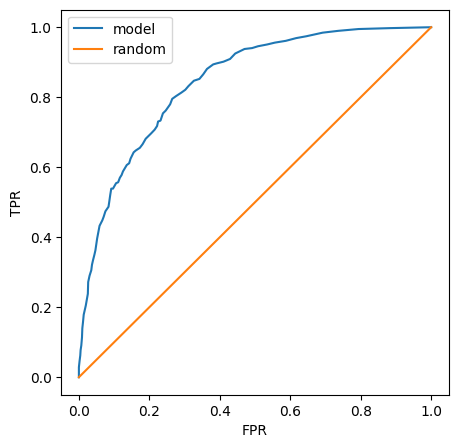

In [96]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0, 1], [0, 1], label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [97]:
from sklearn.metrics import roc_curve

In [98]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

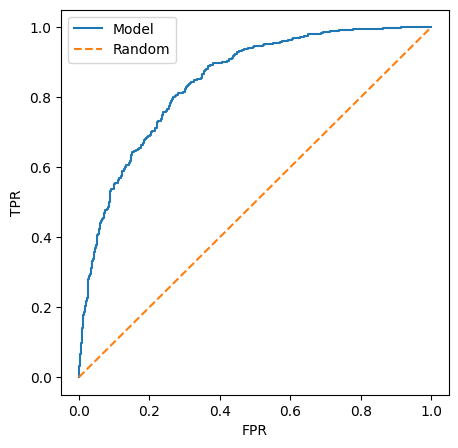

In [100]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# 4.6 ROC AUC

In [104]:
from sklearn.metrics import auc

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [105]:
auc(fpr, tpr)

0.8445038720820102

In [106]:
auc(df_scores.fpr, df_scores.tpr)

0.8443696534119398

In [107]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [109]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8445038720820102

In [108]:
from sklearn.metrics import roc_auc_score

In [110]:
roc_auc_score(y_val, y_pred)

0.8445038720820102

In [111]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [113]:
import random

In [114]:
n = 100000
success = 0

for i in range(n):
    neg_ind = random.randint(0, len(neg) - 1)
    pos_ind = random.randint(0, len(pos) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84434

In [115]:
n = 10000
pos_ind = np.random.randint(0, len(pos), size = n)
neg_ind = np.random.randint(0, len(neg), size = n)

In [118]:
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.8427)

# 4.7 Cross Validation

In [158]:
def train(df, y, C=1.0):
    dicts = df[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=2000)
    model.fit(X_train, y)

    return dv, model

In [153]:
dv, model = train(df_train, y_train, C=0.001)

In [154]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [155]:
y_pred = predict(df_val, dv, model)

In [156]:
from sklearn.model_selection import KFold

In [125]:
kfold = KFold(n_splits=10, shuffle=True, random_state = 1)

In [126]:
kfold.split(df_full_train)

<generator object _BaseKFold.split at 0x7003405da8a0>

In [127]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [128]:
len(train_idx), len(val_idx)

(5070, 564)

In [129]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [131]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [135]:
from tqdm.auto import tqdm

In [159]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):

    scores = []

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.008


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.1 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.5 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=1 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=5 0.842 +- 0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=10 0.842 +- 0.007


In [160]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8584032088573997

# 4.8 Summary

- Metric - a single number that describes the performance of a model
- Accuracy - fraction of correct answers; sometimes misleading
- Precision and recall are less misleading when we have class inbalance
- ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
- K-Fold CV - more reliable estimate for performance (mean + std)